--- k-Nearest Neighbors Classification ---
Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)
Testing dataset: Remaining 50 points to be classified

Results for k = 1:
Results for k = 2:
Results for k = 3:
Results for k = 4:
Results for k = 5:
Results for k = 20:
Results for k = 30:
Point x51 (value: 0.1411) is classified as Class1


Classification complete.

Point x52 (value: 0.3923) is classified as Class1


Classification complete.

Point x53 (value: 0.9939) is classified as Class2


Classification complete.

Point x54 (value: 0.8686) is classified as Class2


Classification complete.

Point x55 (value: 0.7899) is classified as Class2


Classification complete.

Point x56 (value: 0.2934) is classified as Class1


Classification complete.

Point x57 (value: 0.4024) is classified as Class2


Classification complete.

Point x58 (value: 0.8487) is classified as Class2


Classification complete.

Point x59 (value: 0.1602) is classified as 

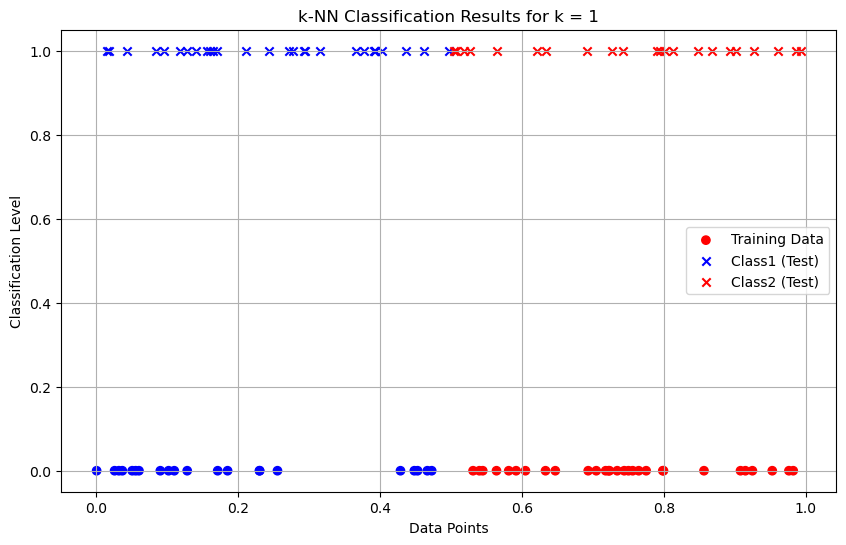

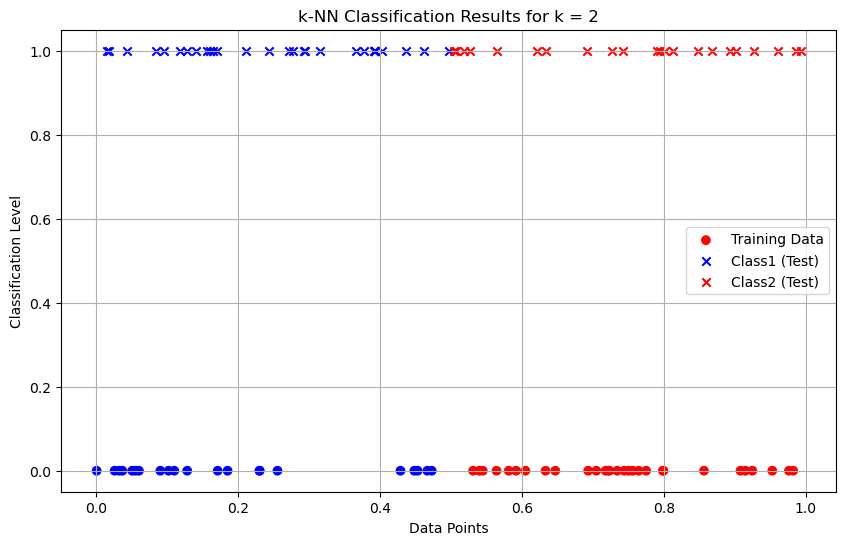

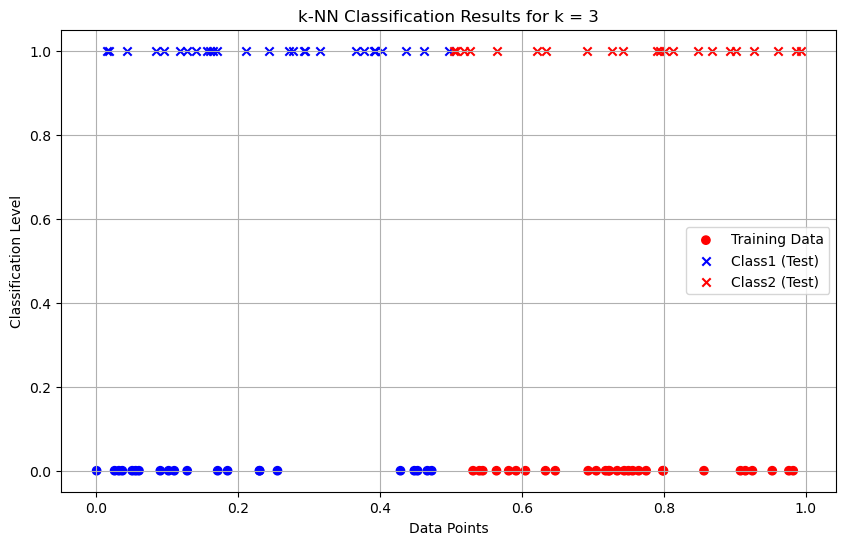

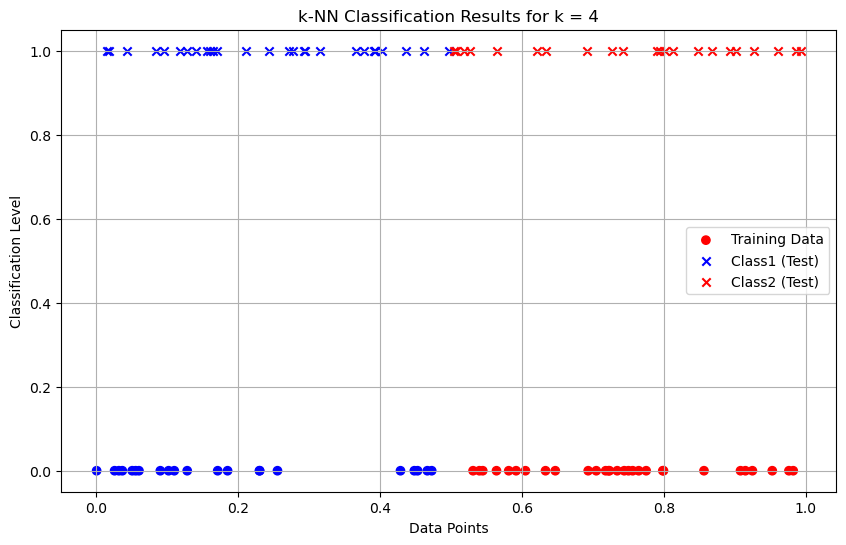

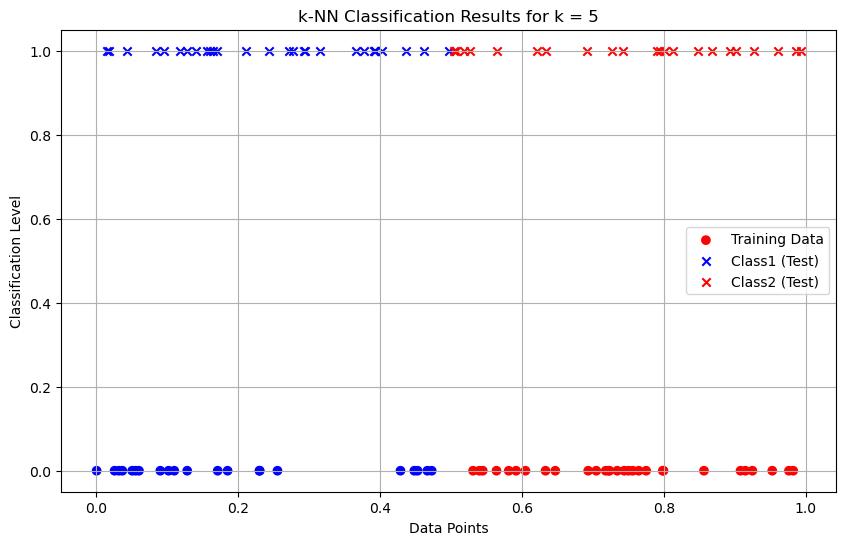

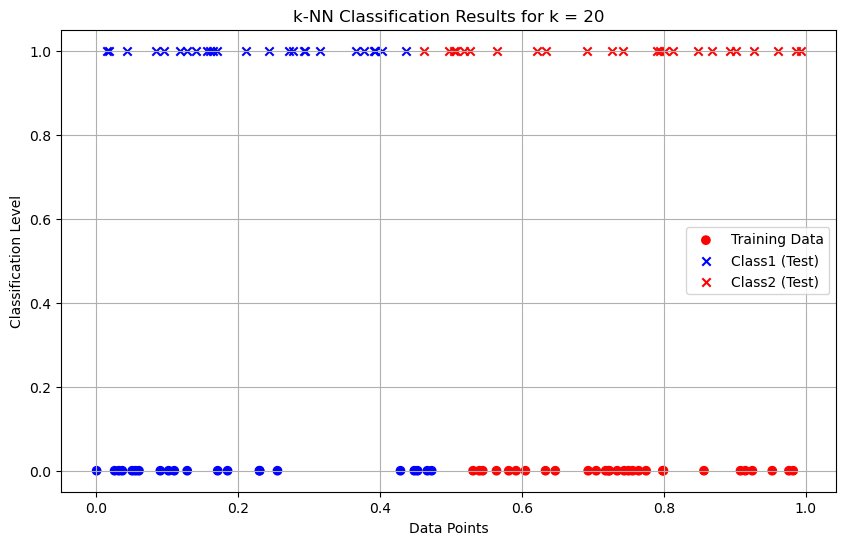

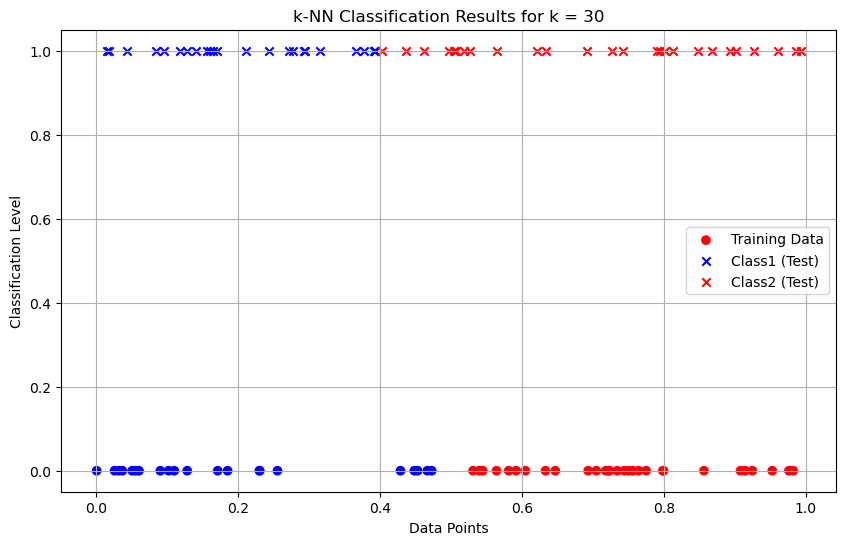

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter 
data = np.random.rand(100) 
labels = ["Class1" if x <= 0.5 else "Class2" for x in data[:50]] 
def euclidean_distance(x1, x2): 
    return abs(x1 - x2) 
def knn_classifier(train_data, train_labels, test_point, k): 
    distances = [(euclidean_distance(test_point, train_data[i]), train_labels[i]) for i in range(len(train_data))] 
    distances.sort(key=lambda x: x[0]) 
    k_nearest_neighbors = distances[:k] 
    k_nearest_labels = [label for _, label in k_nearest_neighbors] 
    return Counter(k_nearest_labels).most_common(1)[0][0] 
train_data = data[:50] 
train_labels = labels 
test_data = data[50:] 
k_values = [1, 2, 3, 4, 5, 20, 30] 
print("--- k-Nearest Neighbors Classification ---") 
print("Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)") 
print("Testing dataset: Remaining 50 points to be classified\n") 
results = {} 
for k in k_values: 
   print(f"Results for k = {k}:") 
   classified_labels = [knn_classifier(train_data, train_labels, test_point, k) for test_point in test_data] 
   results[k] = classified_labels 

for i, label in enumerate(classified_labels, start=51): 
    print(f"Point x{i} (value: {test_data[i - 51]:.4f}) is classified as {label}") 
    print("\n") 
    print("Classification complete.\n") 
for k in k_values: 
    classified_labels = results[k] 
    class1_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"] 
    class2_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"] 
    plt.figure(figsize=(10, 6)) 
    plt.scatter(train_data, [0] * len(train_data), c=["blue" if label == "Class1" else "red" for label in train_labels], 
    label="Training Data", marker="o") 
    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x") 
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x") 
    plt.title(f"k-NN Classification Results for k = {k}") 
    plt.xlabel("Data Points") 
    plt.ylabel("Classification Level") 
    plt.legend() 
    plt.grid(True) 
    plt.show()
    

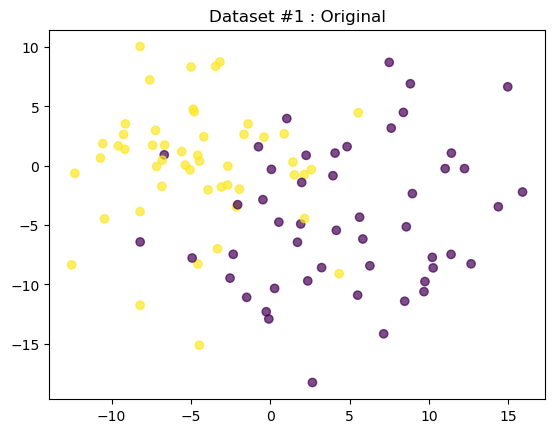

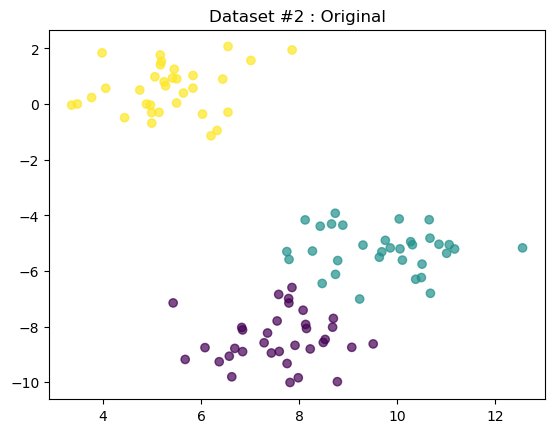

C:\Users\SIC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\SIC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\SIC\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SIC\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\SIC\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(execu

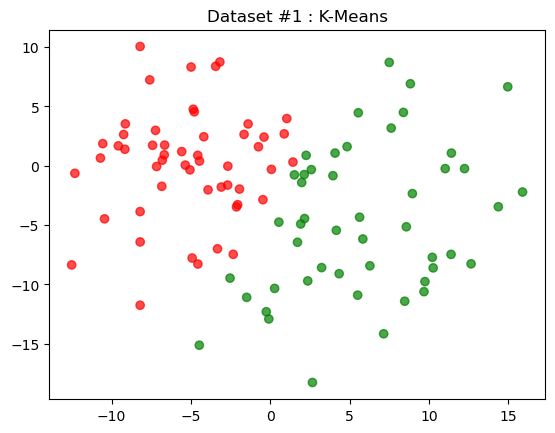

C:\Users\SIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


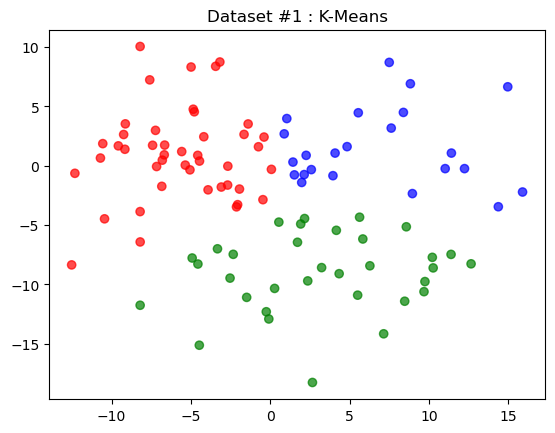

C:\Users\SIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


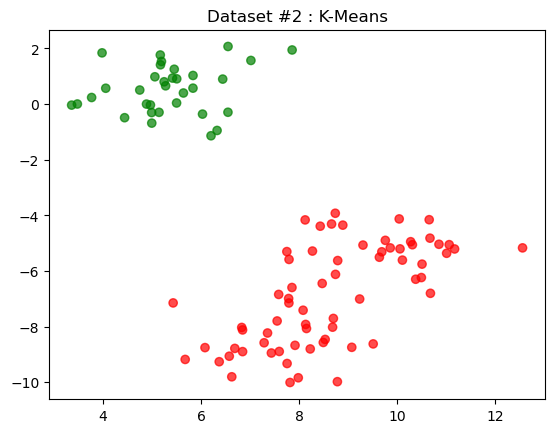

C:\Users\SIC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


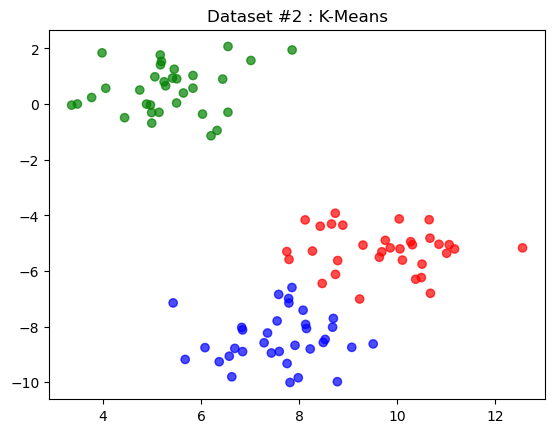

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

X2, label2 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std = 1, random_state=321)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

kmeans = KMeans(n_clusters=2,random_state=123)                
kmeans.fit(X1)                                                  
myColors = {0:'red',1:'green', 2:'blue'}                      
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : K-Means')
plt.show()

kmeans = KMeans(n_clusters=3,random_state=123)                 
kmeans.fit(X1)                                                 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 ) 
plt.title('Dataset #1 : K-Means')
plt.show()

kmeans = KMeans(n_clusters=2,random_state=123)                 
kmeans.fit(X2)                                                  
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()


kmeans = KMeans(n_clusters=3, random_state=123)               
kmeans.fit(X2)                                                  
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()

species
virginica     36
versicolor     2
Name: count, dtype: int64
species
setosa    50
Name: count, dtype: int64
species
versicolor    48
virginica     14
Name: count, dtype: int64


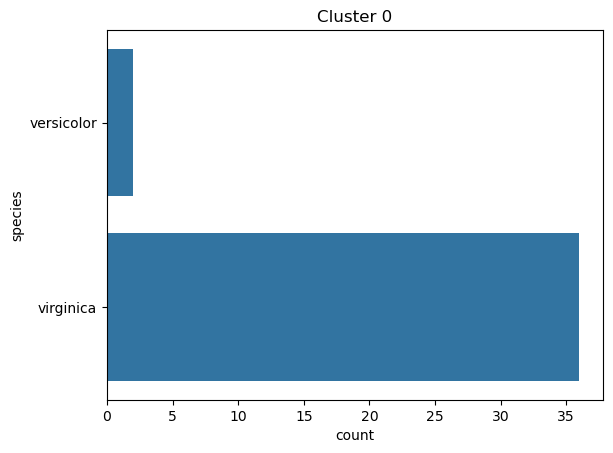

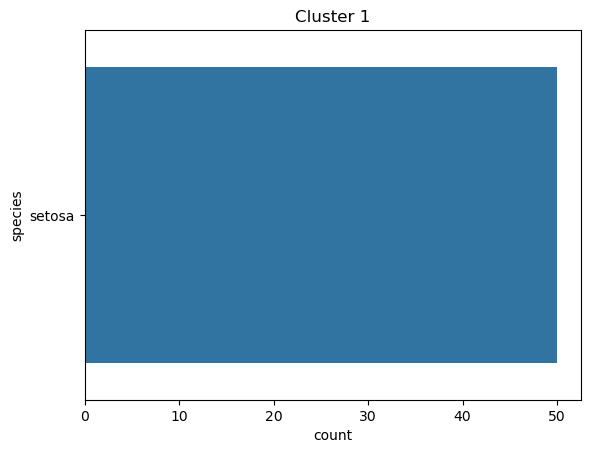

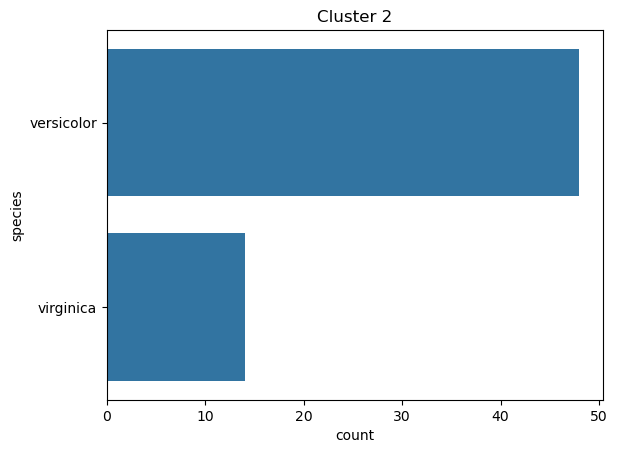

Predicted cluster 0 with the most probable label 'Virginica'
Predicted cluster 1 with the most probable label 'Setosa'
Predicted cluster 2 with the most probable label 'Versicolor'


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                        # Only X variables.
Y = df['species']                                       # Only Y variable.
header_X = X.columns                                    # Store the column names of X.
df.head()
kmeans = KMeans(n_clusters=3, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)   
# Frequency table of the observations labeled as '0'.
# This cluster has the majority 'virginica'.
case0 = Y[res==0]
print(case0.value_counts())
# Frequency table of the observations labeled as '1'.
# This cluster corresponds entirely to 'setosa'.
case1 = Y[res==1]
print(case1.value_counts())

# Frequency table of the observations labeled as '2'.
# This cluster has the majority 'versicolor'.
case2 = Y[res==2]
print(case2.value_counts())

# A list that contains the learned labels.
learnedLabels = ['Virginica','Setosa','Versicolor']  

# Print out the cluster centers (centroids).
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)

# Visualize the labeling content of the cluster 0. 
sns.countplot(case0).set_title('Cluster 0')
plt.show()

# Visualize the labeling content of the cluster 1. 
sns.countplot(case1).set_title('Cluster 1')
plt.show()

# Visualize the labeling content of the cluster 2. 
sns.countplot(case2).set_title('Cluster 2')
plt.show()
# For a given observation of X, predict the species from what we have learned. 
# Case #1.
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

# Case #2.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

# Case #3.
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
make_blobs


<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\SIC\scikit_learn_data
Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00  

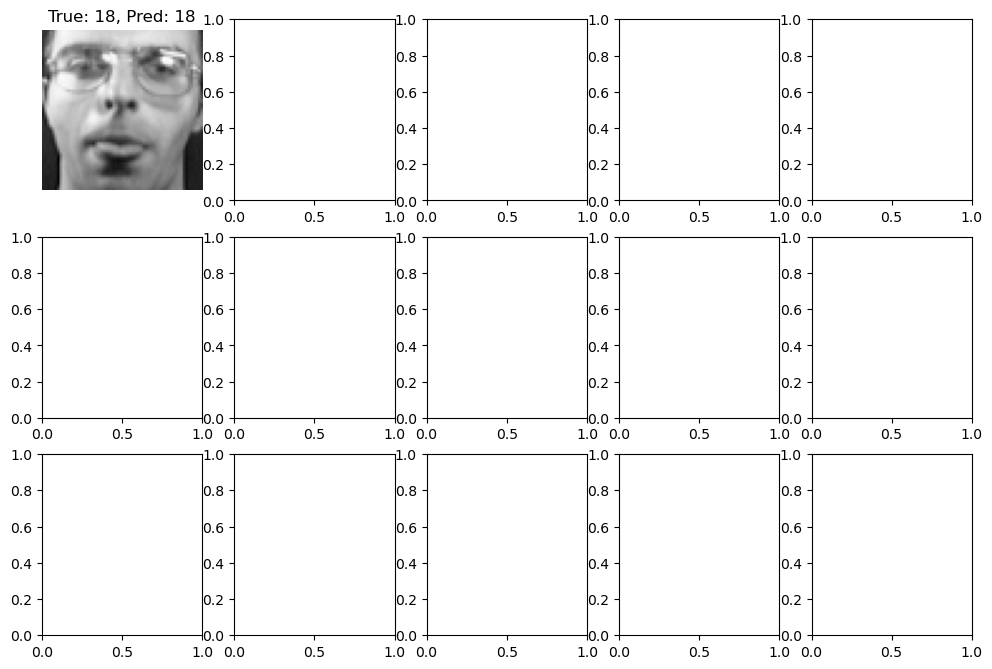

In [23]:
import numpy as np 
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import matplotlib.pyplot as plt 
data = fetch_olivetti_faces(shuffle=True, random_state=42) 
X = data.data 
y = data.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%') 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred, zero_division=1)) 
print("\nConfusion Matrix:") 
print(confusion_matrix(y_test, y_pred)) 

cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy') 
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%') 
fig, axes = plt.subplots(3, 5, figsize=(12, 8)) 
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred): 
   ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray) 
   ax.set_title(f"True: {label}, Pred: {prediction}") 
   ax.axis('off') 
   plt.show()

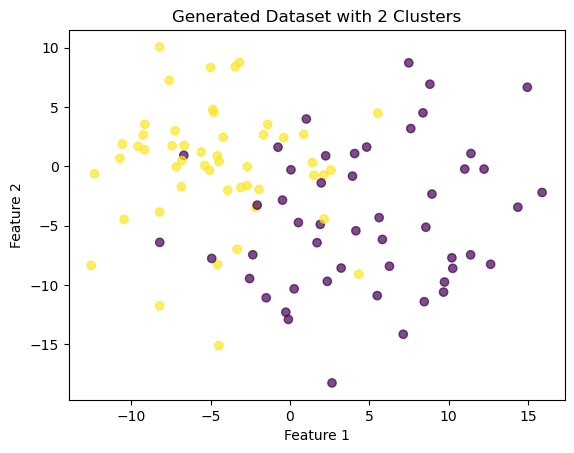

In [25]:
import matplotlib.pyplot as plt

X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5, random_state=123)

plt.scatter(X1[:, 0], X1[:, 1], c=label1, cmap='viridis', alpha=0.7)
plt.title('Generated Dataset with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [27]:
label1

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [37]:
# Step 1: Import necessary libraries
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (Setosa, Versicolor, Virginica)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 4: Create an SVM classifier with an RBF kernel
svm = SVC(kernel='linear', gamma='scale')  # 'gamma' is a parameter for RBF kernel

# Step 5: Train the SVM model on the training data
svm.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = svm.predict(X_test)

# Step 7: Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM classifier on the Iris dataset: {accuracy * 100:.2f}%')


Accuracy of the SVM classifier on the Iris dataset: 100.00%
